In [1]:
import pickle
import pandas as pd
import warnings
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize
import statsmodels.api as sm
from scipy import stats

In [2]:
#file_path = 'monthly_data/regression_data_sensor.pkl'
#with open(file_path, 'rb') as file:
#    flow=pickle.load(file)
#censusdata = pickle.load( open( "diff_in_diff.p", "rb" ) )
#new = censusdata.groupby(['zipcode'])
#results = new.sum()
flow = pd.read_pickle("sensor_traffic_updated.pkl") 

In [3]:
flow

,sensorid,2020_05,2020_06,2022_05,2022_06,zip,total,hispanic,non-hispanic white,non-hispanic black,...,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13,num_cars,diverse index,diffindiff
3,10002-W,184.104053,154.057491,250.019090,327.968811,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,239.826357
6,10006-N,55.087401,47.334460,74.915365,99.976389,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,72.469892
7,10006-S,36.502758,31.810210,50.718381,67.427937,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,49.833351
8,10006-W,205.477635,171.600031,275.009698,360.761452,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,258.693484
9,10007-N,64.171721,54.205945,86.484721,109.667704,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,77.774760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,9313-W,16.765192,14.535697,29.604236,29.197236,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,27.500583
9289,9314-E,27.602726,24.799490,49.331998,53.026591,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,49.956373
9290,9314-N,153.953032,132.174594,291.371158,314.303588,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,319.547120
9291,9314-S,165.185528,154.743735,333.708643,370.404706,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,384.184087


In [4]:
percentage_change_05 = [(flow['2022_05'][i]-flow['2020_05'][i])/flow['2020_05'][i] for i in flow.index]
percentage_change_05 = pd.Series(percentage_change_05,index = flow.index)
flow['percentage_change_05']=percentage_change_05
percentage_change_06 = [(flow['2022_06'][i]-flow['2020_06'][i])/flow['2020_06'][i] for i in flow.index]
percentage_change_06 = pd.Series(percentage_change_06,index = flow.index)
flow['percentage_change_06']=percentage_change_06
flow = flow[flow['percentage_change_06']<=3]
flow = flow[flow['percentage_change_05']<=3]
average_percentage_change = [(flow['percentage_change_06'][i]+flow['percentage_change_05'][i])/2 for i in flow.index]
average_percentage_change = pd.Series(average_percentage_change,index = flow.index)
flow['average_percentage_change']=average_percentage_change

In [13]:

percentage_change = [(flow['2022_05'][i]-flow['2020_05'][i]) for i in flow.index]
percentage_change = pd.Series(percentage_change,index = flow.index)
flow['percentage_change']=percentage_change

In [14]:
sum(flow['percentage_change'])/(sum(flow['2020_05']))

0.7329447478981893

In [5]:
modified_flow = flow.drop('sensorid', axis=1)

grouped = modified_flow.groupby(['zip'])
results = grouped.mean()

In [6]:
flow = results

In [7]:
flow

,2020_05,2020_06,2022_05,2022_06,total,hispanic,non-hispanic white,non-hispanic black,non-hispanic asian,non-hispanic other,...,industry_10,industry_11,industry_12,industry_13,num_cars,diverse index,diffindiff,percentage_change_05,percentage_change_06,average_percentage_change
zip,,,,,,,,,,,,,,,,,,,,,
90003,129.810034,106.270592,182.488143,186.661472,74117.0,59098.0,308.0,13496.0,184.0,1031.0,...,0.145,0.114,0.084,0.021,41731.0,0.330842,133.068989,0.473630,0.842146,0.657888
90006,93.767578,80.429999,171.756518,181.430254,58560.0,42591.0,2653.0,1794.0,10698.0,824.0,...,0.130,0.200,0.106,0.014,28854.0,0.434464,178.989195,0.906297,1.281604,1.093951
90007,61.445941,52.820901,113.755182,125.328402,42380.0,22081.0,6983.0,4244.0,7635.0,1437.0,...,0.298,0.133,0.070,0.019,17510.0,0.657750,124.816742,1.018293,1.546876,1.282585
90011,79.303945,65.711098,109.544573,121.852392,110750.0,101144.0,825.0,7164.0,515.0,1102.0,...,0.154,0.111,0.064,0.022,57963.0,0.161588,86.381921,0.478516,0.972409,0.725462
90012,43.563455,41.561983,109.965812,119.823583,37268.0,10660.0,6428.0,5271.0,13542.0,1367.0,...,0.186,0.152,0.046,0.031,35363.0,0.735048,144.663957,1.528637,1.897678,1.713158
90016,81.859164,72.613570,157.828681,173.084115,46340.0,25309.0,4588.0,12416.0,2430.0,1597.0,...,0.199,0.139,0.073,0.030,31656.0,0.616183,176.440061,0.981704,1.436984,1.209344
90017,69.214477,60.469897,139.203187,152.127889,27832.0,16887.0,2892.0,2823.0,4546.0,684.0,...,0.155,0.161,0.069,0.012,11958.0,0.583489,161.646702,1.095907,1.601669,1.348788
90018,83.686114,72.088033,156.063183,170.901364,52444.0,30040.0,3371.0,14744.0,2834.0,1455.0,...,0.203,0.143,0.093,0.033,31498.0,0.585038,171.190399,0.896945,1.404477,1.150711
90023,71.566903,61.523715,79.478368,123.122757,46517.0,44780.0,680.0,507.0,297.0,253.0,...,0.165,0.103,0.060,0.036,28545.0,0.072885,69.510507,0.135090,1.051779,0.593434


In [8]:
vac_data=pd.read_csv('covid19vaccinesbyzipcode_test.csv')
vac_data = vac_data[vac_data['as_of_date']=='2022-04-26']
zipss = vac_data['zip_code_tabulation_area'].values
check = [vac_data[vac_data['zip_code_tabulation_area']==int(i)]['percent_of_population_with_1_plus_dose'].values[0] if int(i) in zipss else 0 for i in flow.index]
check = pd.Series(check,index = flow.index)
flow['vac_rate'] = check

In [9]:
flow['vac_rate'].describe()

count    55.000000
mean      0.810152
std       0.068765
min       0.682784
25%       0.757584
50%       0.797862
75%       0.849386
max       1.000000
Name: vac_rate, dtype: float64

In [10]:
new_data = pd.read_pickle("new_data_with_zip.p") 

index0 = [pd.to_datetime(new_data['ep_date'][i])<=pd.to_datetime('4/30/22') for i in new_data.index]
index0 = pd.Series(index0,index = new_data.index)
new_data['index0']=index0
new_data_430 = new_data[new_data['index0']==True]

compare = list(flow.index)

In [11]:
case = {}
for i in compare:
    if float(i) in new_data.zip0.values:
        case[i]=sum(new_data_430[new_data_430['zip0']==float(i)]['cases_7day'].values)
    elif float(i) in new_data.zip1.values:
        case[i]=sum(new_data_430[new_data_430['zip1']==float(i)]['cases_7day'].values)
    elif float(i) in new_data.zip2.values:
        case[i]=sum(new_data_430[new_data_430['zip2']==float(i)]['cases_7day'].values)
    elif float(i) in new_data.zip3.values:
        case[i]=sum(new_data_430[new_data_430['zip3']==float(i)]['cases_7day'].values)
    elif float(i) in new_data.zip4.values:
        case[i]=sum(new_data_430[new_data_430['zip4']==float(i)]['cases_7day'].values)
    elif i == '90017':
        case[i]=sum(new_data_430[new_data_430['geo_merge']=='Wellington Square']['cases_7day'].values)
    elif i == '91504':
        case[i]=sum(new_data_430[new_data_430['geo_merge']=='Burbank']['cases_7day'].values)
    else:
        print(i)
cases = [case[i] for i in flow.index]
cases = pd.Series(cases, index = flow.index)
flow['cases']=cases

In [12]:
flow
#1:Agriculture, forestry, fishing and hunting, and mining
#2:Construction-
#3:Manufacturing-
#4:Wholesale trade
#5:Retail trade-
#6:Transportation and warehousing, and utilities-
#7:Information
#8:Finance and insurance, and real estate and rental and leasing
#9:Professional, scientific, and management, and administrative and waste management services
#10:Educational services, and health care and social assistance-
#11:Arts, entertainment, and recreation, and accommodation and food services
#12:Other services, except public administration
#13:Public administration

,2020_05,2020_06,2022_05,2022_06,total,hispanic,non-hispanic white,non-hispanic black,non-hispanic asian,non-hispanic other,...,industry_12,industry_13,num_cars,diverse index,diffindiff,percentage_change_05,percentage_change_06,average_percentage_change,vac_rate,cases
zip,,,,,,,,,,,,,,,,,,,,,
90003,129.810034,106.270592,182.488143,186.661472,74117.0,59098.0,308.0,13496.0,184.0,1031.0,...,0.084,0.021,41731.0,0.330842,133.068989,0.473630,0.842146,0.657888,0.745721,260561
90006,93.767578,80.429999,171.756518,181.430254,58560.0,42591.0,2653.0,1794.0,10698.0,824.0,...,0.106,0.014,28854.0,0.434464,178.989195,0.906297,1.281604,1.093951,0.821740,224632
90007,61.445941,52.820901,113.755182,125.328402,42380.0,22081.0,6983.0,4244.0,7635.0,1437.0,...,0.070,0.019,17510.0,0.657750,124.816742,1.018293,1.546876,1.282585,0.921076,84803
90011,79.303945,65.711098,109.544573,121.852392,110750.0,101144.0,825.0,7164.0,515.0,1102.0,...,0.064,0.022,57963.0,0.161588,86.381921,0.478516,0.972409,0.725462,0.740350,257464
90012,43.563455,41.561983,109.965812,119.823583,37268.0,10660.0,6428.0,5271.0,13542.0,1367.0,...,0.046,0.031,35363.0,0.735048,144.663957,1.528637,1.897678,1.713158,0.984597,36695
90016,81.859164,72.613570,157.828681,173.084115,46340.0,25309.0,4588.0,12416.0,2430.0,1597.0,...,0.073,0.030,31656.0,0.616183,176.440061,0.981704,1.436984,1.209344,0.839931,141916
90017,69.214477,60.469897,139.203187,152.127889,27832.0,16887.0,2892.0,2823.0,4546.0,684.0,...,0.069,0.012,11958.0,0.583489,161.646702,1.095907,1.601669,1.348788,0.880316,10106
90018,83.686114,72.088033,156.063183,170.901364,52444.0,30040.0,3371.0,14744.0,2834.0,1455.0,...,0.093,0.033,31498.0,0.585038,171.190399,0.896945,1.404477,1.150711,0.764442,48350
90023,71.566903,61.523715,79.478368,123.122757,46517.0,44780.0,680.0,507.0,297.0,253.0,...,0.060,0.036,28545.0,0.072885,69.510507,0.135090,1.051779,0.593434,0.819923,235620


In [13]:
flow[flow['vac_rate']>=0.99]

,2020_05,2020_06,2022_05,2022_06,total,hispanic,non-hispanic white,non-hispanic black,non-hispanic asian,non-hispanic other,...,industry_12,industry_13,num_cars,diverse index,diffindiff,percentage_change_05,percentage_change_06,average_percentage_change,vac_rate,cases
zip,,,,,,,,,,,,,,,,,,,,,
90045,55.032549,51.910165,126.568436,145.008865,39795.0,7361.0,20762.0,3978.0,5441.0,2253.0,...,0.058,0.019,128428.0,0.661698,164.634587,1.302791,1.76177,1.53228,1.0,64160


In [14]:
case_rate = [flow['cases'][i]/flow['total'][i] for i in flow.index]
case_rate = pd.Series(case_rate,index=flow.index)
flow['case_rate'] = case_rate
total_1 = [flow['total'][i]/10000 for i in flow.index]
total_1 = pd.Series(total_1,index=flow.index)
flow['total_1'] = total_1
mean_income = [flow['mean income (dollars)'][i]/10000 for i in flow.index]
mean_income = pd.Series(mean_income,index=flow.index)
flow['mean_income'] = mean_income
popu_d = [flow['population density'][i]/10000 for i in flow.index]
popu_d = pd.Series(popu_d,index=flow.index)
flow['popu_d'] = popu_d

In [15]:
commuting_car = [flow['commuting_carpool'][i]+flow['commuting_drove_alone'][i] for i in flow.index]
commuting_car = pd.Series(commuting_car,index=flow.index)
flow['commuting_car'] = commuting_car
essential_worker = [flow['industry_2'][i]+flow['industry_3'][i]+flow['industry_5'][i]+flow['industry_6'][i] for i in flow.index]
essential_worker = pd.Series(essential_worker,index=flow.index)
flow['essential_worker'] = essential_worker

with open('revision2_data.pkl', 'wb') as file:
        pickle.dump(flow, file)

In [2]:
flow = pd.read_pickle("revision2_data.pkl") 

In [3]:
from scipy import stats
print(stats.pearsonr(flow['case_rate'], flow['total']))
print(stats.pearsonr(flow['cases'], flow['total']))

PearsonRResult(statistic=-0.031262183807730326, pvalue=0.8207529581681461)
PearsonRResult(statistic=0.52074650786205, pvalue=4.58613697191207e-05)


In [8]:
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
# Define dependent, exogenous, endogenous, and instruments variables
dependent = flow['average_percentage_change']
exog = sm.add_constant(flow[['vac_rate',#M1
          'case_rate',#M2
         'total_1',#M3
          'employed_ratio',#4
          'black_ratio', 'asian_ratio','other_ratio','hispanic_ratio','diverse index',#M5
          #'essential_worker',
          'commuting_car','commuting_time'
         ]])  # Exogenous variables
instruments = flow['mean_income']  # Endogenous regressor
endog = flow['popu_d']  # Instrumental variables

# Fit the IV2SLS model
model = IV2SLS(dependent,exog, endog, instruments)
results = model.fit()
print(results.summary)
results.wu_hausman()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 0.0991
P-value: 0.7546
Distributed: F(1,41)
WaldTestStatistic, id: 0x7f9d15d44340

In [32]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# Assuming you have a dataset with endogenous variable `y`, endogenous regressor `x`, and instrument `z`

# Define the endogenous and exogenous variables
y = flow['average_percentage_change']
x = flow['case_rate']
z = flow['total']

# Step 1: Regress the potentially endogenous variable on the instrument
stage1 = sm.OLS(x, sm.add_constant(z)).fit()

# Step 2: Use predicted values of endogenous variable as instruments
x_hat = stage1.predict(sm.add_constant(z))

# Step 3: Regress the outcome on the predicted values of the endogenous variable
stage2 = sm.OLS(y, sm.add_constant(x_hat)).fit()

# DWH test
endog_test = sm.stats.diagnostic.linear_reset(stage2)
print(endog_test)


ModuleNotFoundError: No module named 'linearmodels'

In [40]:
ex_variables= flow[['vac_rate',#M1
          'case_rate',#M2
         'total_1',#M3
          'employed_ratio','mean_income',#4
          'popu_d','black_ratio', 'asian_ratio','other_ratio','hispanic_ratio','diverse index',#M5
          'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5','industry_6', 'industry_7', 'industry_8', 'industry_9', 'industry_10','industry_11', 'industry_12', #M6
          #'essential_worker',
          'commuting_car','commuting_time'
         ]]

matrix = ex_variables.corr()
print("Correlation matrix is : ")
print(matrix)
matrix.to_csv('correlation_matrix.csv', index=True)


Correlation matrix is : 
                vac_rate  case_rate   total_1  employed_ratio  mean_income  \
vac_rate        1.000000  -0.168724 -0.390584        0.153558     0.353184   
case_rate      -0.168724   1.000000 -0.031262       -0.070332    -0.189408   
total_1        -0.390584  -0.031262  1.000000       -0.176932    -0.387877   
employed_ratio  0.153558  -0.070332 -0.176932        1.000000     0.494158   
mean_income     0.353184  -0.189408 -0.387877        0.494158     1.000000   
popu_d         -0.044911   0.131240  0.303221       -0.361006    -0.633413   
black_ratio    -0.173811  -0.102612  0.218299       -0.290633    -0.257733   
asian_ratio     0.477183  -0.153961 -0.357649        0.335659     0.233627   
other_ratio     0.333469  -0.178388 -0.498024        0.206820     0.646850   
hispanic_ratio -0.398244   0.281380  0.554727       -0.254412    -0.762010   
diverse index   0.330767  -0.345966 -0.406072        0.128923     0.361344   
industry_1     -0.350387   0.399626  0.

In [29]:
stage2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     average_percentage_change   R-squared:                       0.101
Model:                                   OLS   Adj. R-squared:                  0.084
Method:                        Least Squares   F-statistic:                     5.967
Date:                       Tue, 03 Sep 2024   Prob (F-statistic):             0.0179
Time:                               10:35:49   Log-Likelihood:                -10.868
No. Observations:                         55   AIC:                             25.74
Df Residuals:                             53   BIC:                             29.75
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6691      1.923     -1.908      0.062      -7.527       0.188
0              1.7018      0.697      2.443      0.018       0.304       3.099
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.334
Skew:                           0.124   Prob(JB):                        0.846
Kurtosis:                       2.709   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
flow.columns

Index(['2020_05', '2020_06', '2022_05', '2022_06', 'total', 'hispanic',
       'non-hispanic white', 'non-hispanic black', 'non-hispanic asian',
       'non-hispanic other', 'employed', 'unemployed',
       'median income (dollars)', 'mean income (dollars)', 'other_ratio',
       'black_ratio', 'white_ratio', 'asian_ratio', 'hispanic_ratio',
       'employed_ratio', 'population density', 'commuting_drove_alone',
       'commuting_carpool', 'commuting_public', 'commuting_walked',
       'commuting_other', 'commuting_at_home', 'commuting_time',
       'class_private_wage', 'class_government', 'class_self', 'class_unpaid',
       'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5',
       'industry_6', 'industry_7', 'industry_8', 'industry_9', 'industry_10',
       'industry_11', 'industry_12', 'industry_13', 'num_cars',
       'diverse index', 'diffindiff', 'percentage_change_05',
       'percentage_change_06', 'average_percentage_change', 'vac_rate',
       'cases', 'ca

In [31]:
X = flow[['vac_rate',#M1
          'case_rate',#M2
         'total_1',#M3
          'employed_ratio','mean_income',#4
          'popu_d','black_ratio', 'asian_ratio','other_ratio','hispanic_ratio','diverse index',#M5
          'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5','industry_6', 'industry_7', 'industry_8', 'industry_9', 'industry_10','industry_11', 'industry_12', #M6
          #'essential_worker',
          'commuting_car','commuting_time'
         ]]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.686
Model:                                   OLS   Adj. R-squared:                  0.416
Method:                        Least Squares   F-statistic:                     2.538
Date:                       Tue, 03 Sep 2024   Prob (F-statistic):            0.00852
Time:                               22:01:12   Log-Likelihood:                 18.081
No. Observations:                         55   AIC:                             15.84
Df Residuals:                             29   BIC:                             68.03
Df Model:                                 25                  

In [32]:
#M8 Using the t test variables
X = flow[['vac_rate',#M1
          #'case_rate',#M2
         'total_1',#M3
          'mean_income',#4
          'other_ratio','white_ratio','hispanic_ratio','diverse index',#M5
          #'essential_worker',
          'industry_1', 'industry_2', 'industry_3','industry_6', 'industry_7', 'industry_8', 'industry_9', 'industry_13', #M6
          'commuting_car'
         ]]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.575
Model:                                   OLS   Adj. R-squared:                  0.396
Method:                        Least Squares   F-statistic:                     3.213
Date:                       Tue, 03 Sep 2024   Prob (F-statistic):            0.00158
Time:                               22:01:36   Log-Likelihood:                 9.7265
No. Observations:                         55   AIC:                             14.55
Df Residuals:                             38   BIC:                             48.67
Df Model:                                 16                  

In [ ]:
## X = flow[['vac_rate',#M1
          'essential_worker'
         ]]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

In [19]:
import scipy
scipy.stats.pearsonr(flow['vac_rate'], flow['essential_worker'])

PearsonRResult(statistic=-0.5492051944975934, pvalue=1.4113200955721087e-05)

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# Sample DataFrame (Replace this with your actual DataFrame)


# Selecting features and target variable from the DataFrame
X = flow[['vac_rate',#M1
          'case_rate',#M2
         'total_1',#M3
          'employed_ratio','mean_income',#4
          'popu_d','white_ratio','black_ratio', 'asian_ratio','hispanic_ratio','diverse index',#M5
          'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5','industry_6', 'industry_7', 'industry_8', 'industry_9', 'industry_10','industry_11', 'industry_12', #M6
          'commuting_drove_alone','commuting_carpool', 'commuting_public', 'commuting_walked', 'commuting_at_home','commuting_time'
         ]]
#X = sm.add_constant(X)  # Add a constant (intercept)
y = flow['average_percentage_change']  # Target variable

# Initialize the Lasso Regressor with an alpha value
lasso = Lasso(alpha=0.01)

# Fit the model
lasso.fit(X, y)

# Making predictions
predictions = lasso.predict(X)

print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("Predictions:", predictions)


Coefficients: [ 0.         -0.02213456 -0.02901441 -0.          0.01792323  0.08830459
  0.03805294  0.         -0.         -0.12743193  0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.          0.          0.          0.         -0.01119045]
Intercept: 1.3739217555787353
Predictions: [0.82654853 0.99749583 1.03904485 0.8105314  1.10094241 0.95402273
 1.23191429 1.00866423 0.85723773 1.13958836 1.14206909 0.92395933
 0.95199547 0.86978926 0.82182456 1.10792112 0.98558981 0.79371445
 1.20293958 0.94066553 1.38876416 0.91778943 1.05087581 1.14269583
 1.16056118 1.13243755 0.91526826 1.12111404 1.21351144 1.10708175
 1.12254624 0.9355194  1.01803987 1.24615379 1.06864181 1.01207665
 1.18160228 1.0697209  1.12842372 0.80709411 0.81391013 0.80659924
 0.93353311 1.00425622 0.93600696 1.12542268 1.13789357 1.10006734
 0.92281053 0.93940717 1.14383273 1.08169816 1.06073177 1.04025865
 1.0451645

/Users/suyanpengzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/suyanpengzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/suyanpengzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/suyanpengzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

In [21]:
#M10 0.001 on lasso
X = flow[['vac_rate',#M1
          'case_rate',#M2
         'total_1',#M3
          'mean_income',#4
          'black_ratio', 'asian_ratio','hispanic_ratio','diverse index',#M5
          'industry_10', #M6
          'commuting_drove_alone','commuting_time'
         ]]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.552
Model:                                   OLS   Adj. R-squared:                  0.437
Method:                        Least Squares   F-statistic:                     4.816
Date:                       Tue, 02 Apr 2024   Prob (F-statistic):           8.40e-05
Time:                               14:04:23   Log-Likelihood:                 8.2785
No. Observations:                         55   AIC:                             7.443
Df Residuals:                             43   BIC:                             31.53
Df Model:                                 11                  

In [22]:
#M10 0.01 on lasso
X = flow[['vac_rate',#M1
          'case_rate',#M2
         'total_1',#M3
          'mean_income',#4
          'hispanic_ratio',#M5
          'commuting_time'
         ]]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.291
Model:                                   OLS   Adj. R-squared:                  0.203
Method:                        Least Squares   F-statistic:                     3.288
Date:                       Tue, 02 Apr 2024   Prob (F-statistic):            0.00862
Time:                               14:04:23   Log-Likelihood:                -4.3334
No. Observations:                         55   AIC:                             22.67
Df Residuals:                             48   BIC:                             36.72
Df Model:                                  6                  

# Figures

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_79274/1879934335.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_set_1 = [flow['2020_05'][4],flow['2020_06'][4]]
/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_79274/1879934335.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_set_2 = [flow['2022_05'][4],flow['2022_06'][4]]


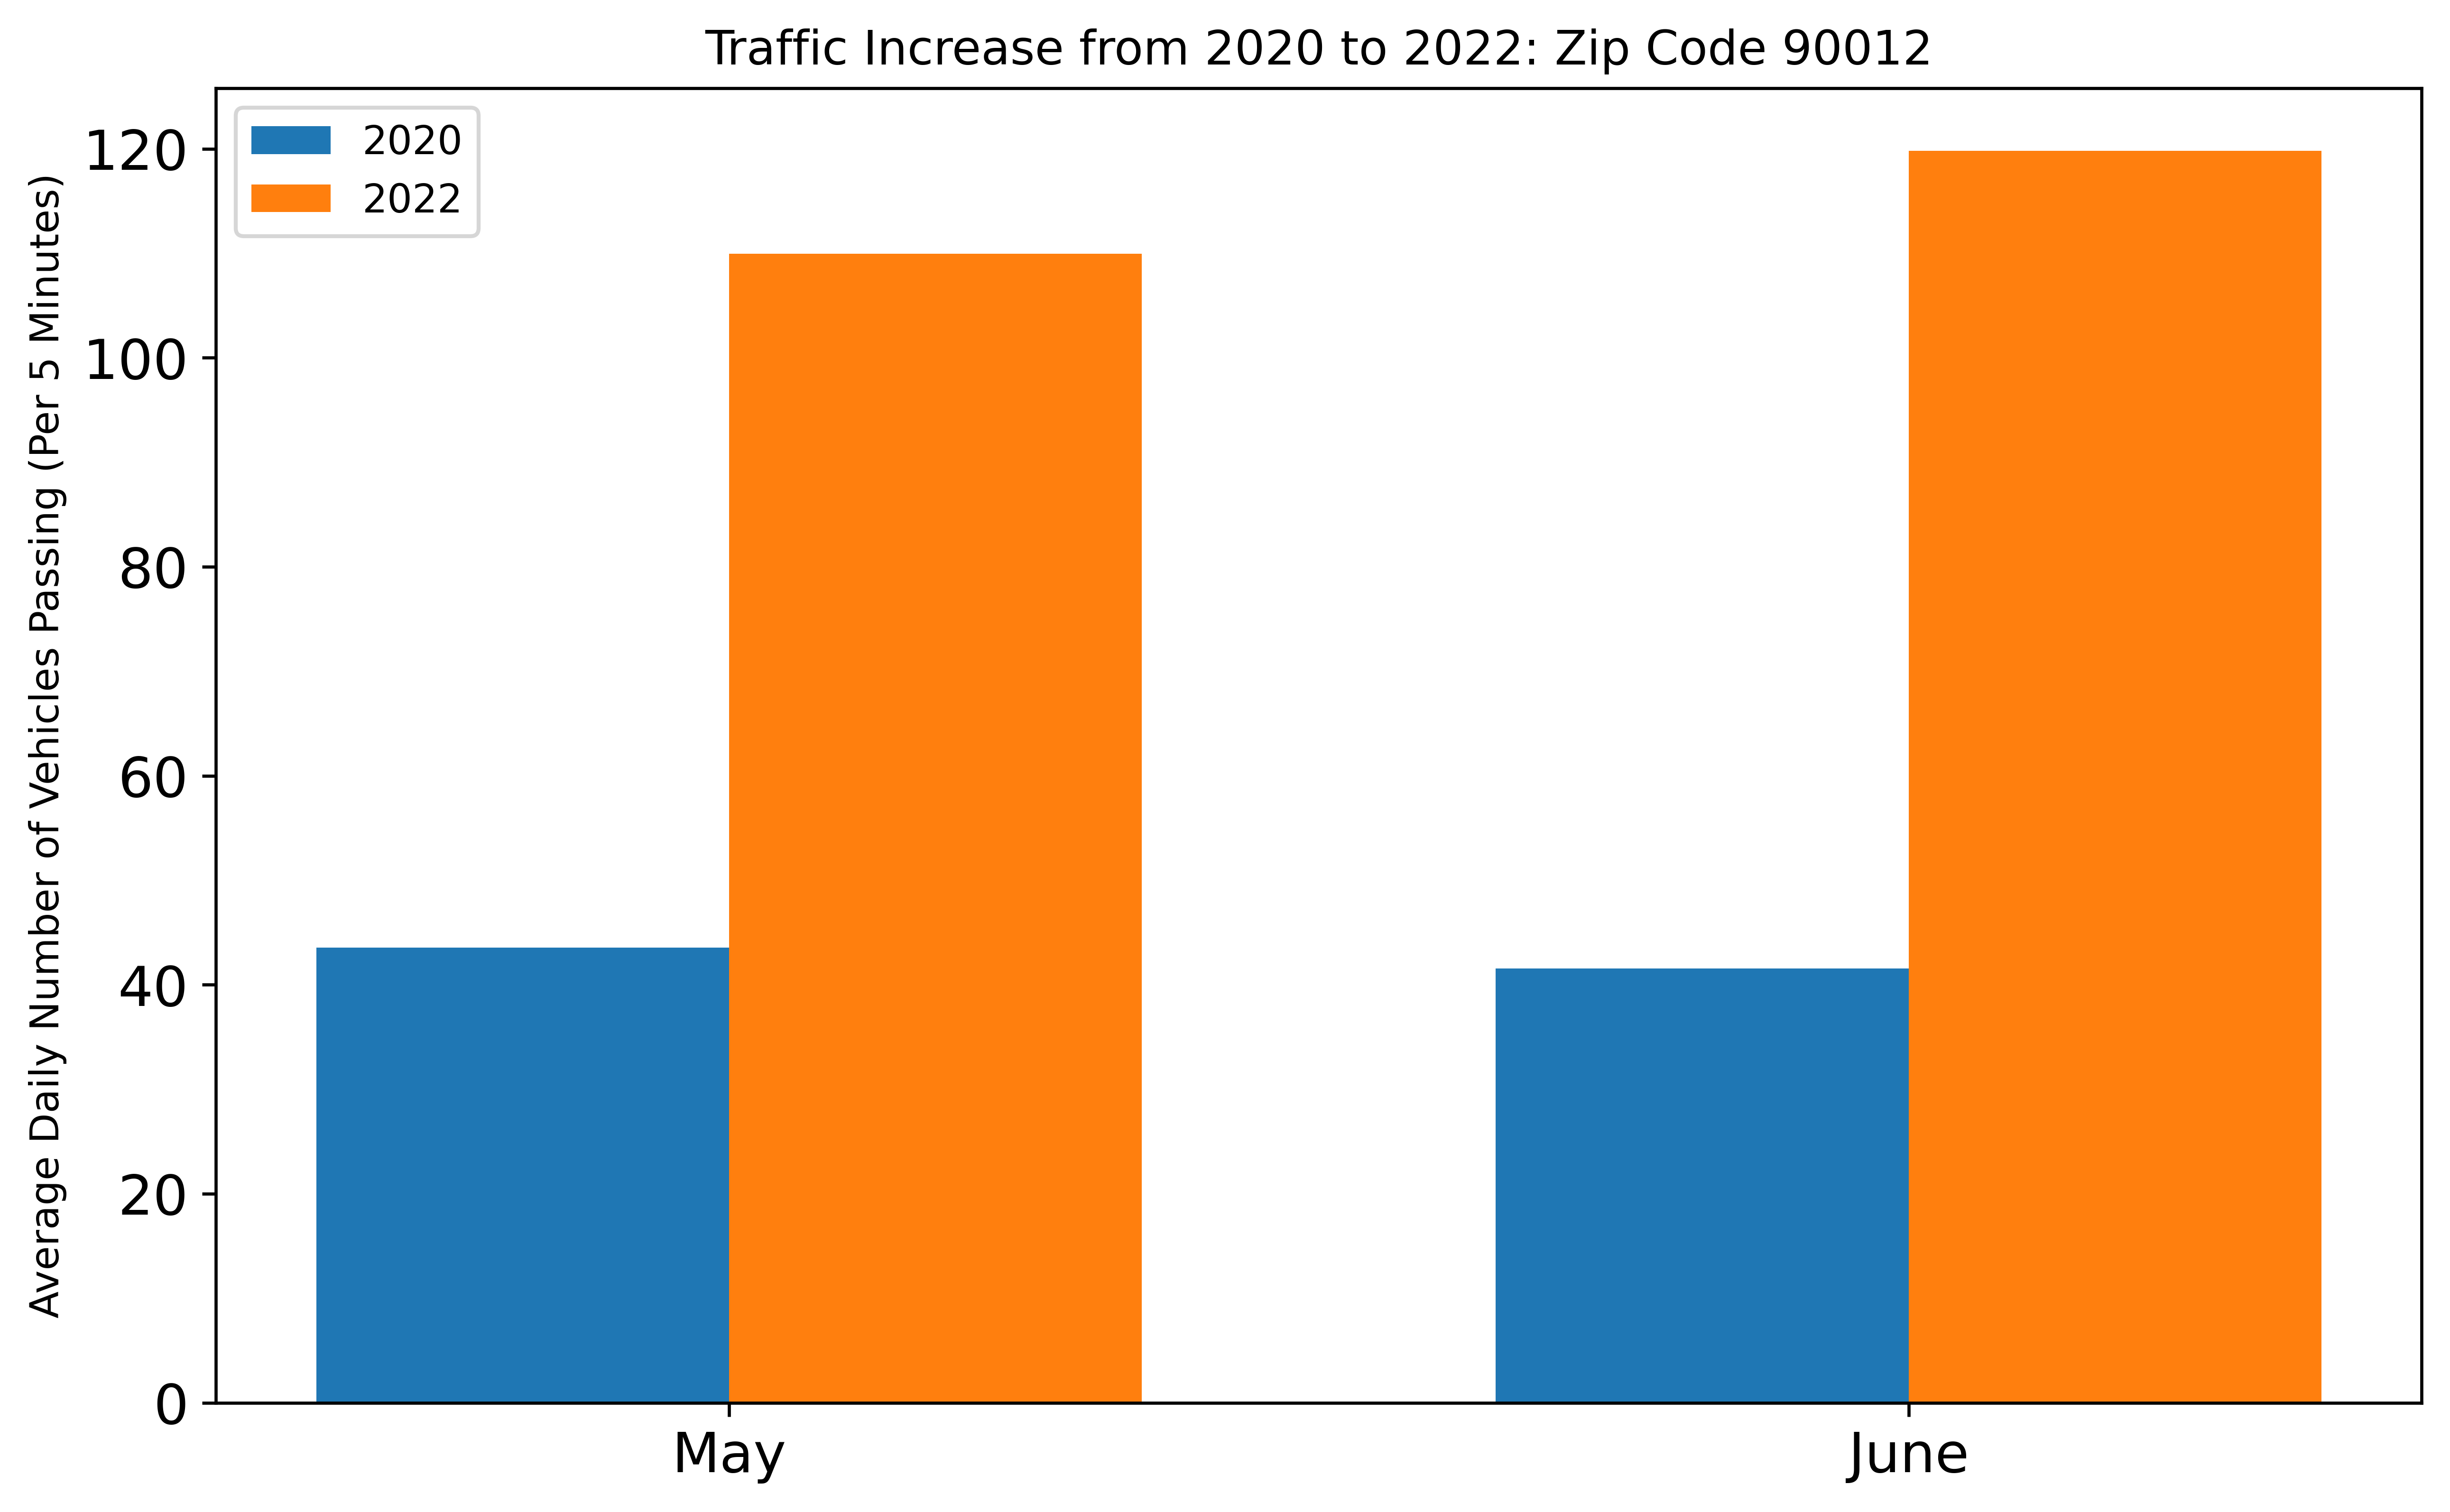

In [23]:
#fig1
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['May', 'June']
values_set_1 = [flow['2020_05'][4],flow['2020_06'][4]]
values_set_2 = [flow['2022_05'][4],flow['2022_06'][4]]

plt.figure(figsize=(10, 6),dpi=600) # This will set the DPI for the plot


# Setting the positions and width for the bars
pos = np.arange(len(categories))
bar_width = 0.35

# Plotting both sets of data
plt.bar(pos, values_set_1, bar_width, label='2020')
plt.bar(pos + bar_width, values_set_2, bar_width, label='2022')

# Adding the title and labels
#plt.xlabel('Categories')
plt.ylabel('Average Daily Number of Vehicles Passing (Per 5 Minutes)')
plt.xticks(fontsize=14,rotation = 0)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=14,rotation = 0)
plt.title('Traffic Increase from 2020 to 2022: Zip Code 90012')
plt.xticks(pos + bar_width / 2, categories)

# Adding a legend
plt.legend()

# Before displaying or saving, you can specify the figure's DPI

# Saving the plot to a PDF file with high DPI
plt.savefig('Figures/fig1b.pdf', dpi=600) # This saves the figure with the specified DPI

# If you want to display the plot as well, uncomment the next line
plt.show()



1: 0.682784 => 0.745721 
2: 0.745721 => 0.766515 
3: 0.766515 => 0.797862 
4: 0.797862 => 0.833717 
5: 0.833717 => 0.872562 
6: 0.872562 => 1.0 

   1   2   3   4   5   6


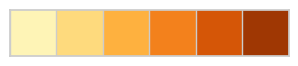

<Figure size 1100x900 with 0 Axes>

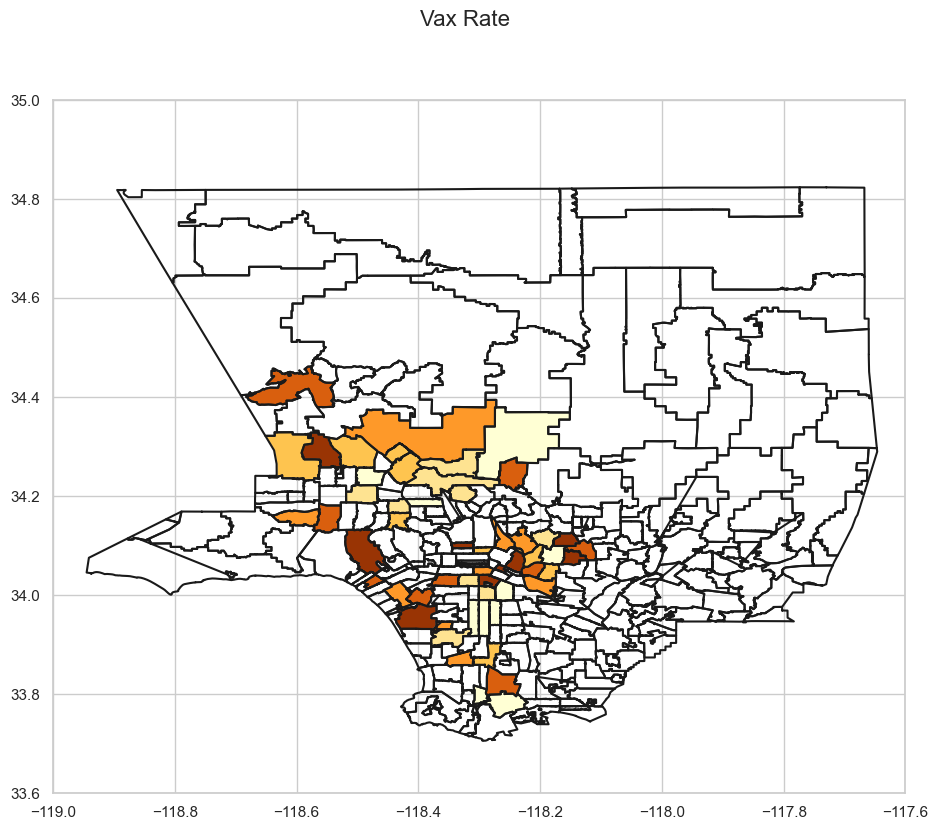

In [23]:
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(100,100))
%matplotlib inline
shp_path = "./zips.shp"
sf = shp.Reader(shp_path)
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df
df = read_shapefile(sf)
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(bins[i])+
                       " => "+str(bins[i+1]), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        if i not in df.zipcode.values:
            continue
        comuna_id.append(df[df['zipcode']==i].index[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = (-119,-117.6) ,# latitude 
                                     y_lim = (33.6, 35), 
                                     figsize = (11,9));
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = (-119,-117.6), 
                                     y_lim = (33.6, 35), 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    plt.xlim(-119,-117.6)
    plt.ylim(33.6, 35)
print_id = False # The shape id will be printed
color_pallete = 0 # 'Purples'
south = [str(i) for i in flow.index]
datax = [i for i in flow['vac_rate']]
plot_comunas_data(sf, 'Vax Rate', south, datax, color_pallete, print_id)

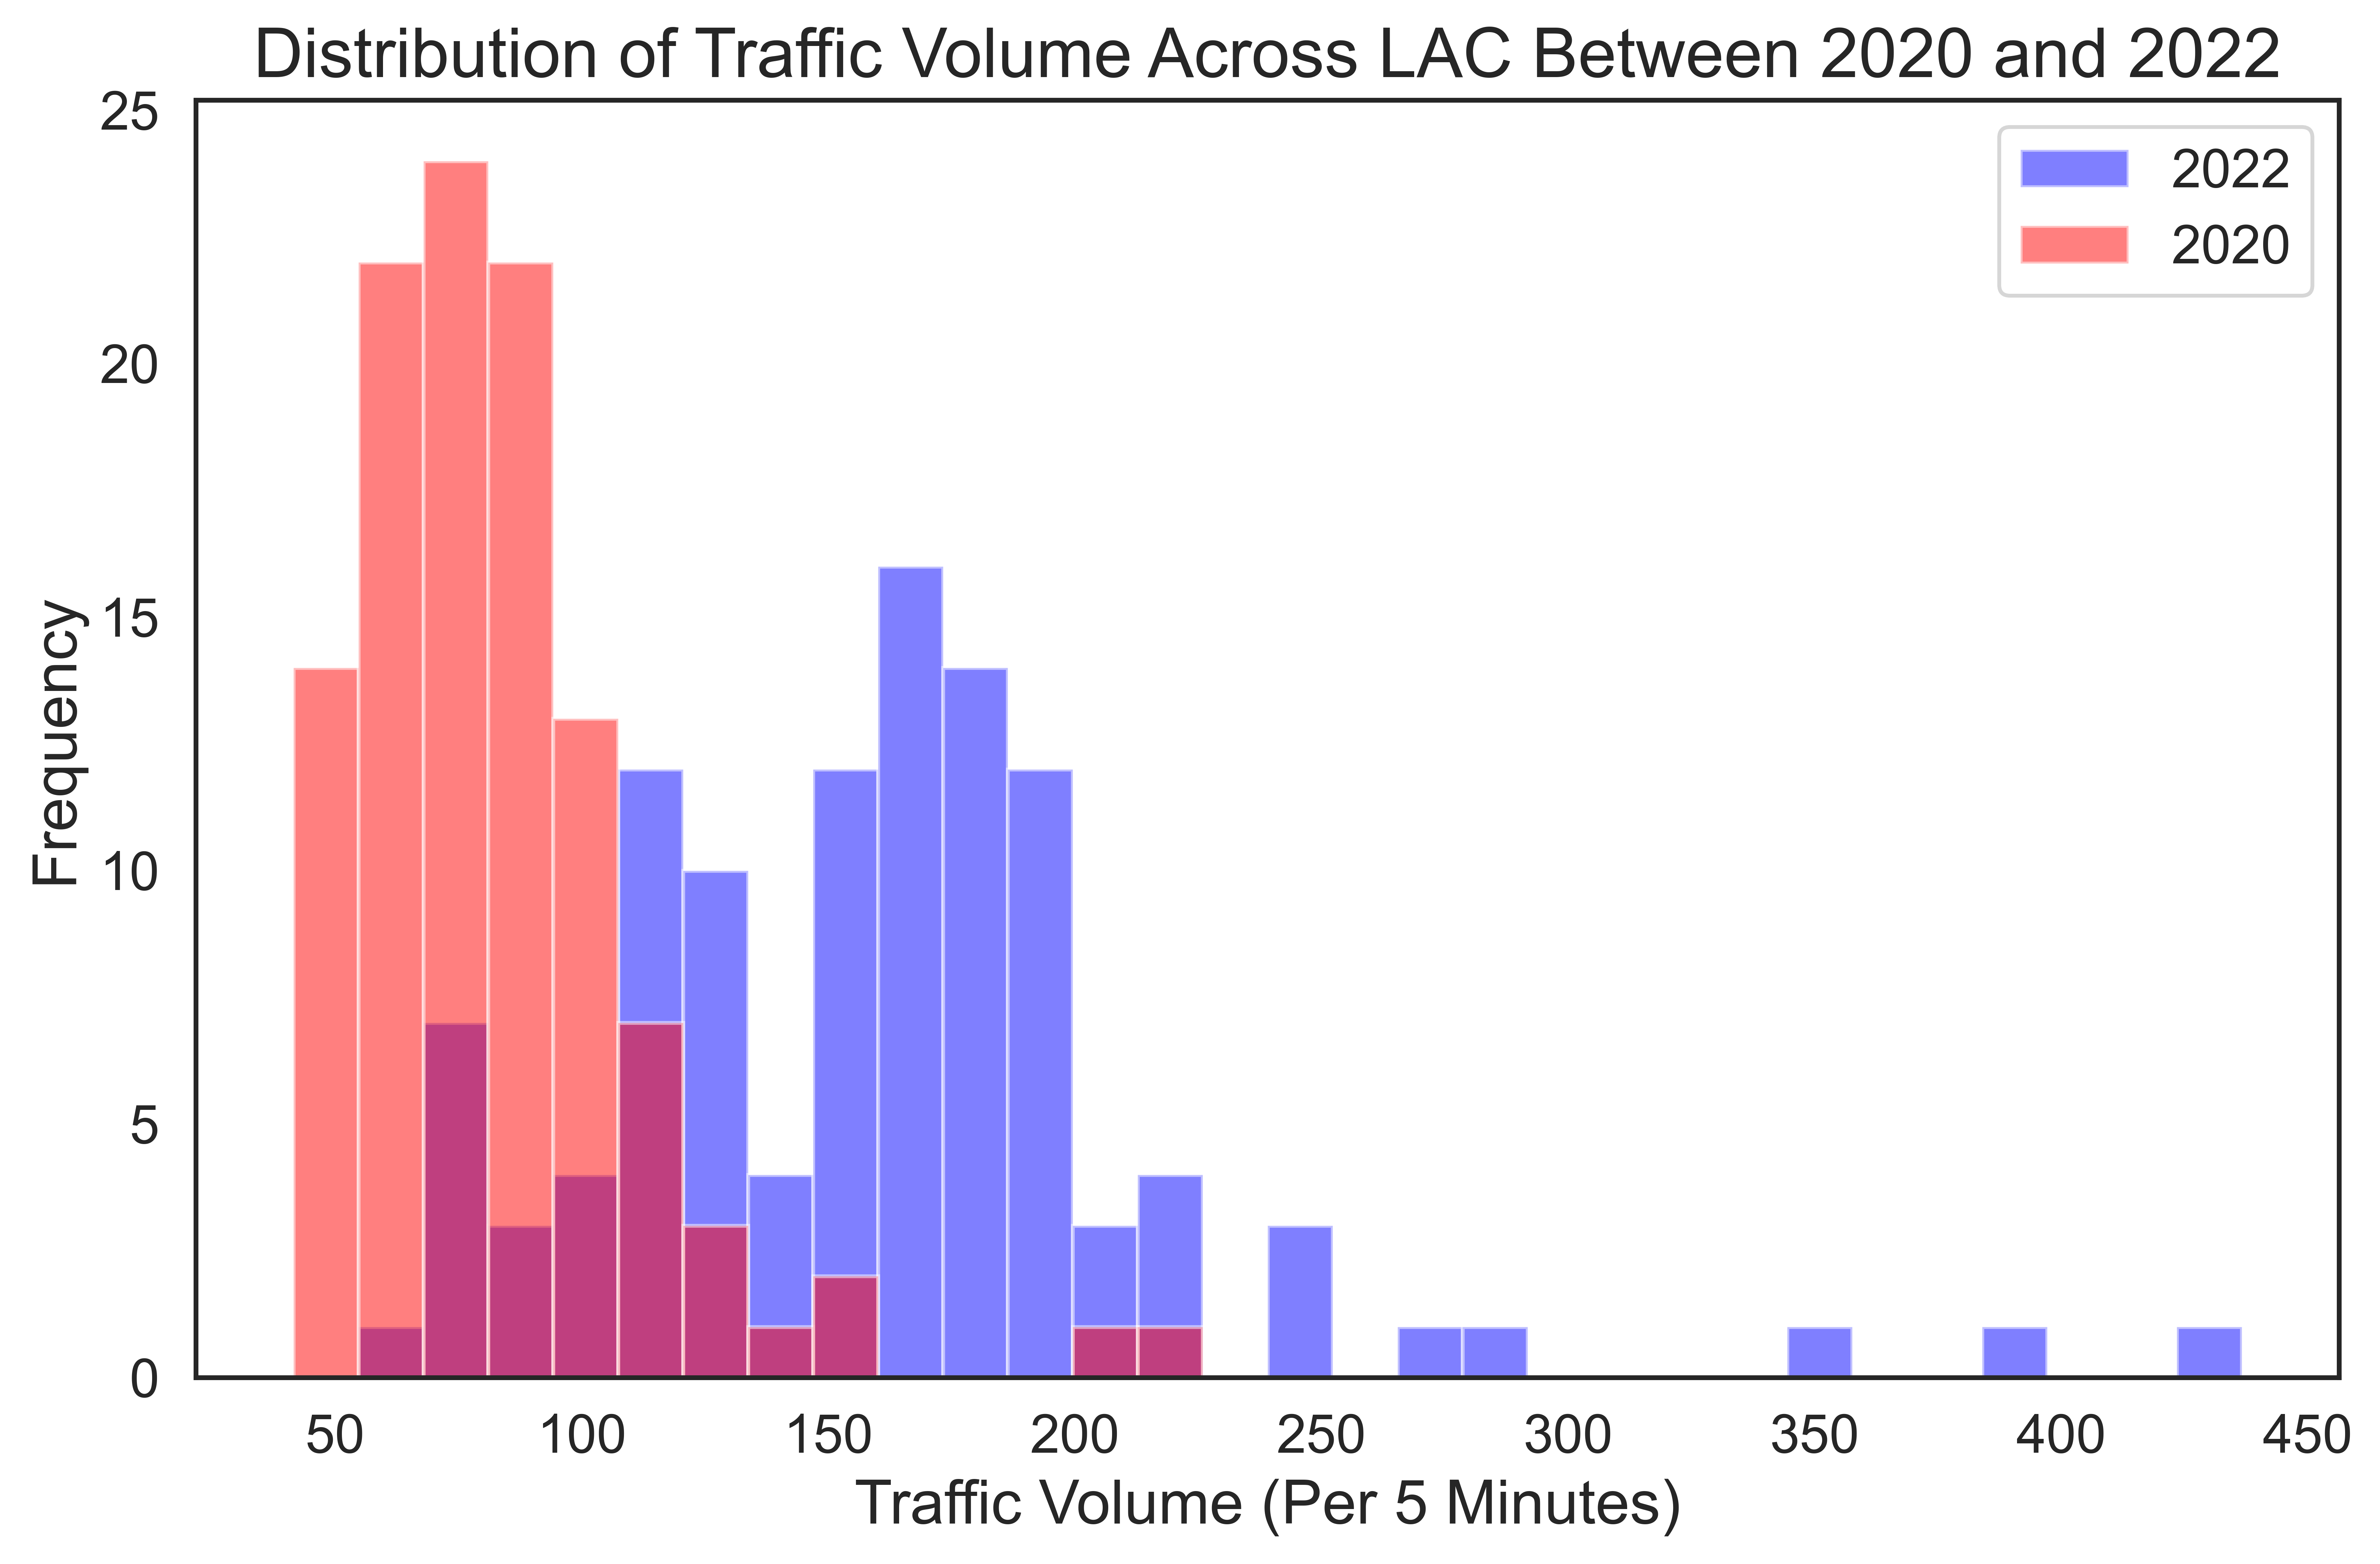

In [24]:
#Fig2a
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of seaborn for better visuals
sns.set_style('white')

# Plotting the Histogram
plt.figure(figsize=(10, 6),dpi=800)

min_bin = min(flow['2022_05'].min(), flow['2020_05'].min(),flow['2022_06'].min(), flow['2020_06'].min())
max_bin = max(flow['2022_05'].max(), flow['2020_05'].max(),flow['2022_06'].max(), flow['2020_06'].max())
bins = np.linspace(min_bin, max_bin, 31)  # For example, creating 20 bins

flow_2022 = [i for i in flow['2022_05']]+[i for i in flow['2022_06']]
flow_2020 = [i for i in flow['2020_05']]+[i for i in flow['2020_06']]

plt.hist(flow_2022, bins=bins, alpha=0.5, color='blue', label='2022')
plt.hist(flow_2020, bins=bins, alpha=0.5, color='red', label='2020')

plt.title('Distribution of Traffic Volume Across LAC Between 2020 and 2022',fontsize=18)

plt.xlabel('Traffic Volume (Per 5 Minutes)',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=14,rotation = 0)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=14,rotation = 0)
plt.legend(fontsize=14)
plt.savefig('Figures/fig2.pdf', dpi=800) # This saves the figure with the specified DPI
plt.show()


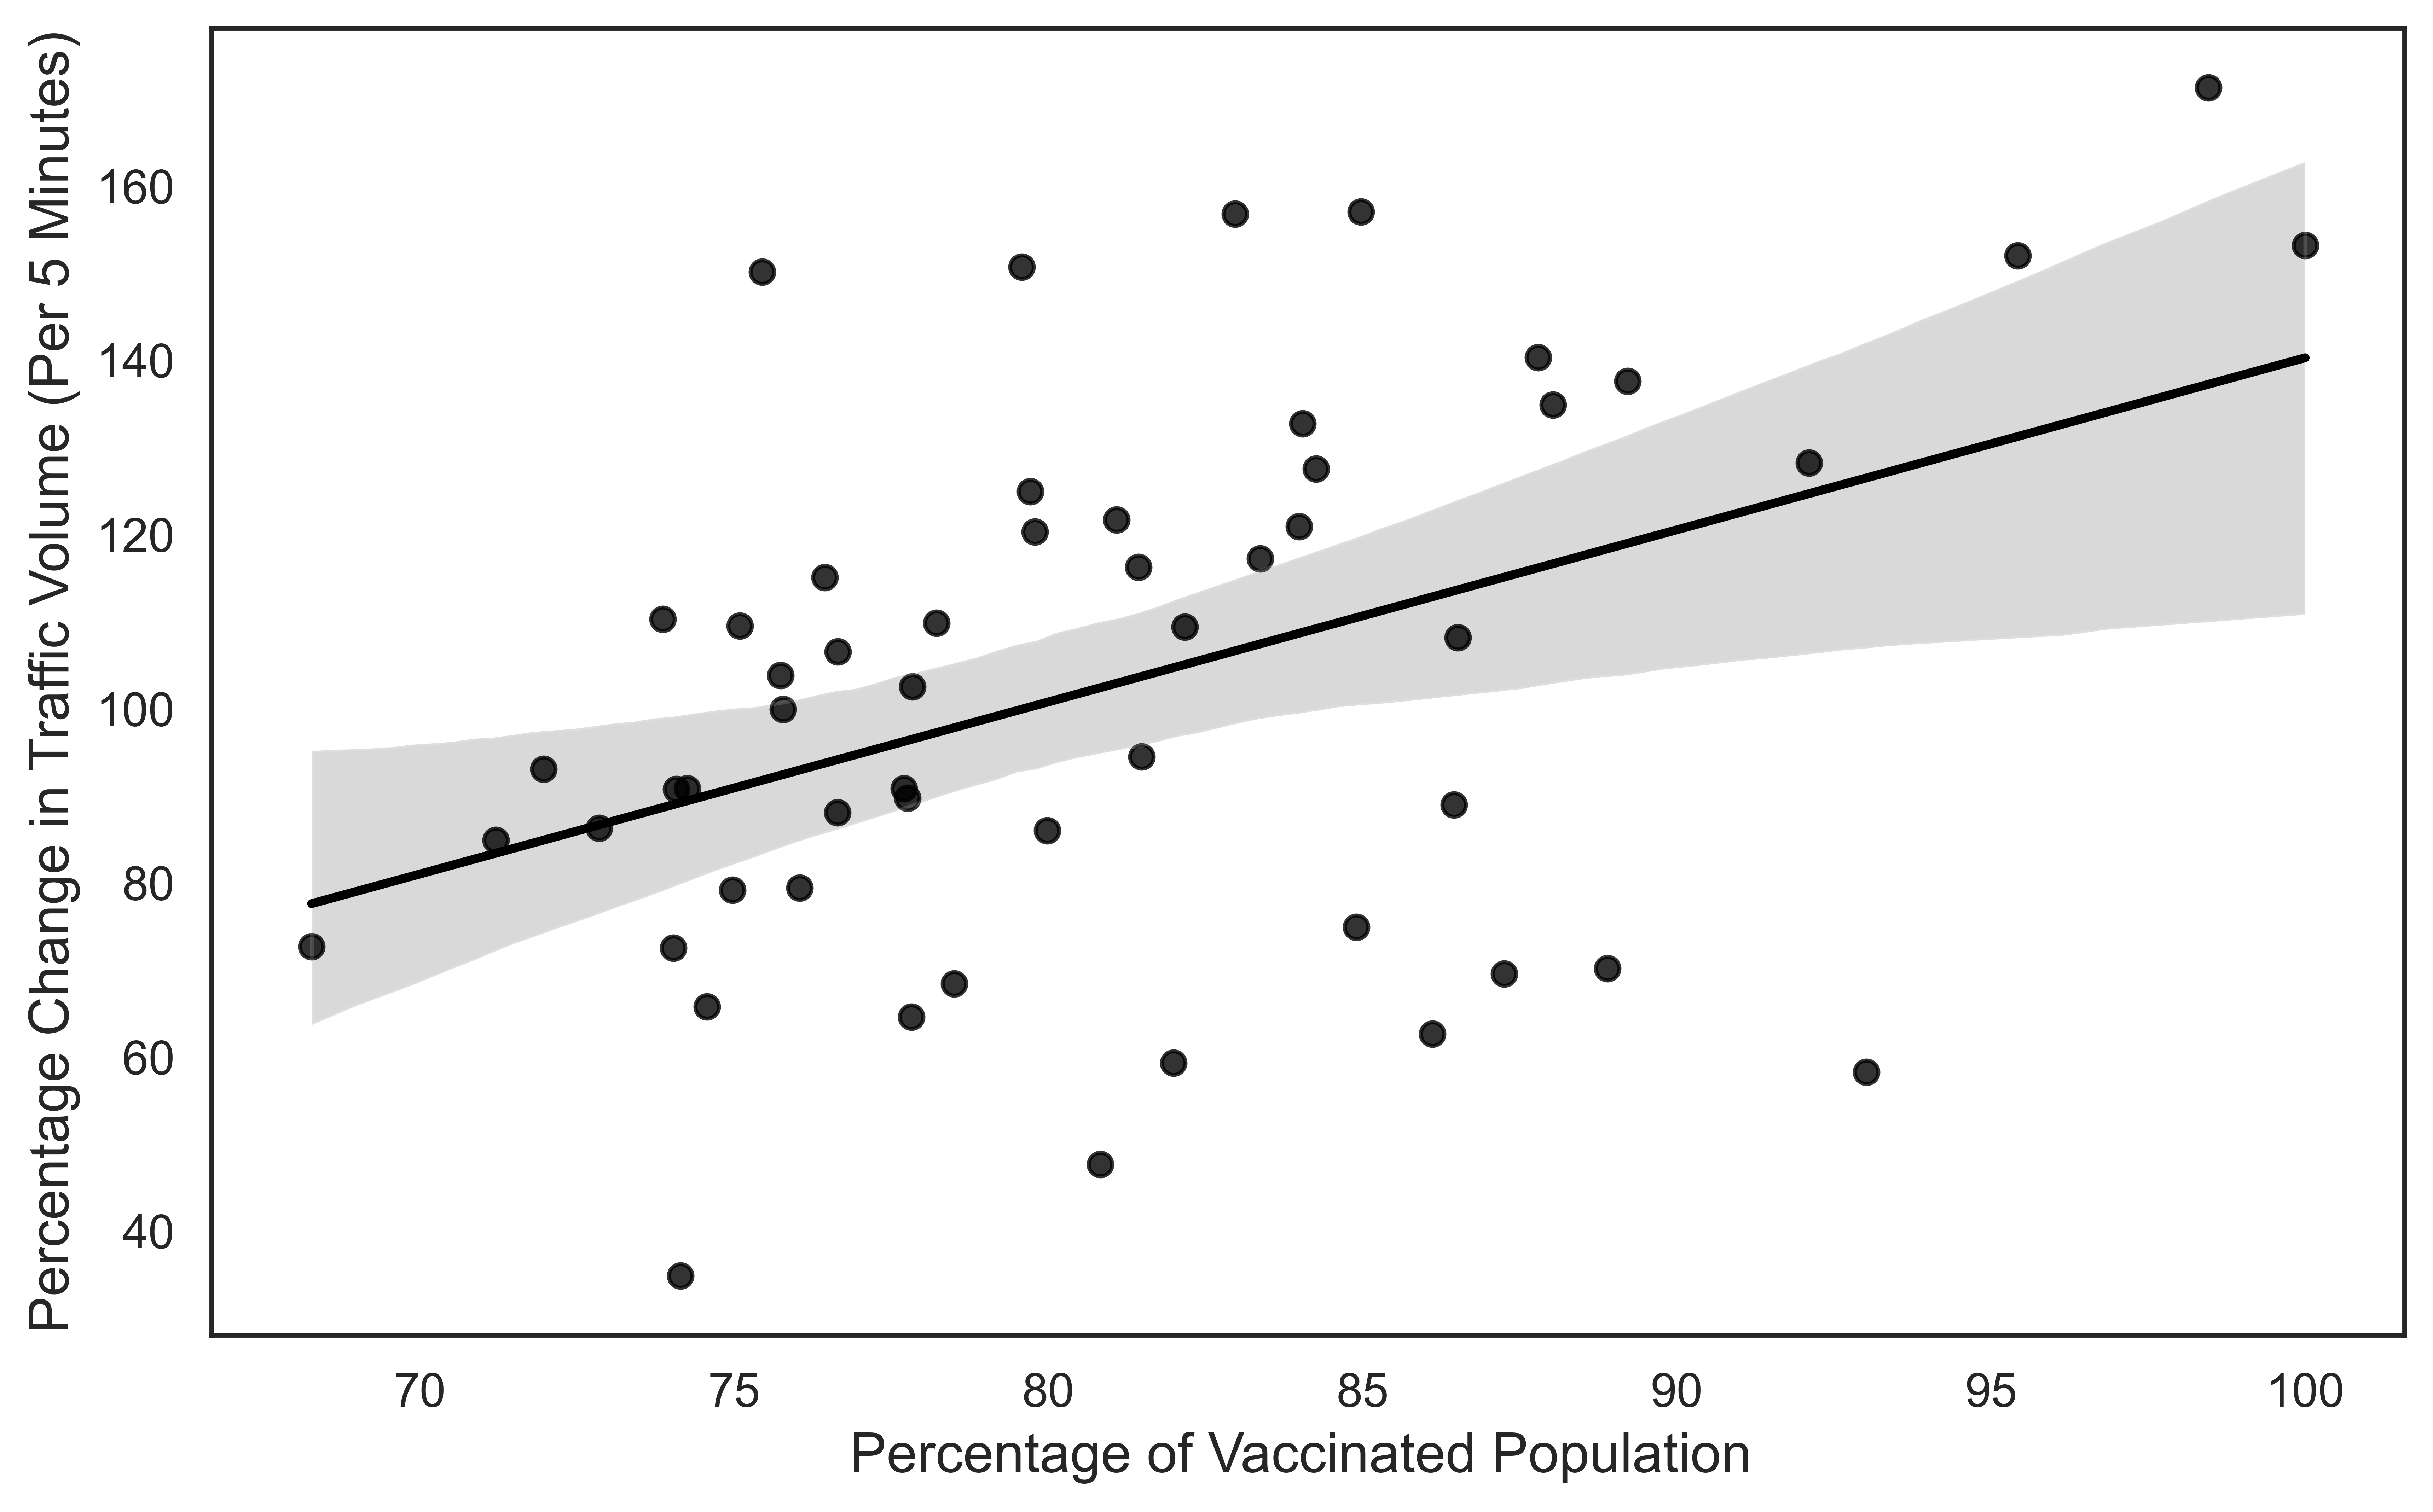

In [25]:
# Fig4 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6),dpi=800)

sns.regplot(100*flow,x='vac_rate', y='average_percentage_change',color = 'black')
#plt.title('OLS Regression Result ',fontsize=14)
plt.xlabel('Percentage of Vaccinated Population ',fontsize=14)
plt.ylabel('Percentage Change in Traffic Volume (Per 5 Minutes)',fontsize=14)
plt.xticks(fontsize=12,rotation = 0)  # Rotate the x-axis labels if needed
plt.yticks(fontsize=12,rotation = 0)

plt.savefig('Figures/fig4.pdf', bbox_inches='tight',dpi=800) 
 
plt.show()

In [26]:
group1 = flow[flow['average_percentage_change']>=np.median(flow['average_percentage_change'])]
group2 = flow[flow['average_percentage_change']<np.median(flow['average_percentage_change'])]

for col in group1.columns:
    if stats.ttest_ind(group1[col],group2[col]).pvalue<10:
        print('*********************************')
        print(col)
        print('Mean '+col+' High Increase Region:')
        print(np.mean(group1[col]))
        print('Mean '+col+' Low Increase Region:')
        print(np.mean(group2[col]))
        print('t-test statistic:',stats.ttest_ind(group1[col],group2[col]))

*********************************
2020_05
Mean 2020_05 High Increase Region:
83.53830529038149
Mean 2020_05 Low Increase Region:
93.70904024729387
t-test statistic: Ttest_indResult(statistic=-1.2264617270576381, pvalue=0.2254460039271868)
*********************************
2020_06
Mean 2020_06 High Increase Region:
74.52606298227998
Mean 2020_06 Low Increase Region:
80.04034791489815
t-test statistic: Ttest_indResult(statistic=-0.7639242546422743, pvalue=0.4482999961712568)
*********************************
2022_05
Mean 2022_05 High Increase Region:
166.85243933059857
Mean 2022_05 Low Increase Region:
139.48944786709615
t-test statistic: Ttest_indResult(statistic=1.9525106434634636, pvalue=0.05616815889860726)
*********************************
2022_06
Mean 2022_06 High Increase Region:
180.98301774369114
Mean 2022_06 Low Increase Region:
158.03114660437245
t-test statistic: Ttest_indResult(statistic=1.3404556964559484, pvalue=0.18581512131069244)
*********************************
total


In [27]:
group1 = flow[flow['vac_rate']>=np.median(flow['vac_rate'])]
group2 = flow[flow['vac_rate']<np.median(flow['vac_rate'])]

for col in group1.columns:
    if stats.ttest_ind(group1[col],group2[col]).pvalue<10:
        print('*********************************')
        print(col)
        print('Mean '+col+' High Vax Region:')
        print(np.mean(group1[col]))
        print('Mean '+col+' Low Vax Region:')
        print(np.mean(group2[col]))
        print('t-test statistic:',stats.ttest_ind(group1[col],group2[col]))

*********************************
2020_05
Mean 2020_05 High Vax Region:
82.91921407923954
Mean 2020_05 Low Vax Region:
94.35106076255217
t-test statistic: Ttest_indResult(statistic=-1.3837168668246378, pvalue=0.17224541039136532)
*********************************
2020_06
Mean 2020_06 High Vax Region:
73.63544167974563
Mean 2020_06 Low Vax Region:
80.96395519160045
t-test statistic: Ttest_indResult(statistic=-1.0195695929871857, pvalue=0.3125642715002241)
*********************************
2022_05
Mean 2022_05 High Vax Region:
149.38788293613325
Mean 2022_05 Low Vax Region:
157.60083968357867
t-test statistic: Ttest_indResult(statistic=-0.5677574317506203, pvalue=0.5725971018212661)
*********************************
2022_06
Mean 2022_06 High Vax Region:
166.37231008802488
Mean 2022_06 Low Vax Region:
173.18299158061902
t-test statistic: Ttest_indResult(statistic=-0.3917536658785949, pvalue=0.6968110105246308)
*********************************
total
Mean total High Vax Region:
40008.35714

# Table 1

In [28]:
for col in flow.columns:
    print('*********************************')
    print(col)
    print(np.mean(flow[col]))
    print(np.std(flow[col]))

*********************************
2020_05
88.53121154195664
30.606351612628867
*********************************
2020_06
77.23307558556529
26.41514362382773
*********************************
2022_05
153.41969806669738
52.80676351467132
*********************************
2022_06
169.71573554802563
63.36384521416516
*********************************
total
46670.67272727273
21422.02712507474
*********************************
hispanic
25755.47272727273
22305.310751114896
*********************************
non-hispanic white
9831.018181818183
7746.28664937045
*********************************
non-hispanic black
4086.7090909090907
6507.05555719811
*********************************
non-hispanic asian
5547.709090909091
5186.255484618507
*********************************
non-hispanic other
1449.7636363636364
737.9443921803413
*********************************
employed
22592.054545454546
9472.58707182934
*********************************
unemployed
1655.9272727272728
857.7974300931311
************

In [29]:
for col in flow.columns:
    print('*********************************')
    print(col)
    print(np.min(flow[col]))
    print(np.max(flow[col]))

*********************************
2020_05
43.563454997422426
224.05292616568772
*********************************
2020_06
41.56198272218017
203.35751370522962
*********************************
2022_05
58.3194530151794
351.1208616970736
*********************************
2022_06
70.45701226934965
436.6365398643734
*********************************
total
11425.0
110750.0
*********************************
hispanic
3041.0
101144.0
*********************************
non-hispanic white
308.0
29117.0
*********************************
non-hispanic black
120.0
31085.0
*********************************
non-hispanic asian
168.0
28448.0
*********************************
non-hispanic other
150.0
3345.0
*********************************
employed
5698.0
48272.0
*********************************
unemployed
337.0
4786.0
*********************************
median income (dollars)
27406.0
129688.0
*********************************
mean income (dollars)
49627.0
226246.0
*********************************
other

In [21]:
pd.set_option('display.max_columns', None)

flow[flow['asian_ratio']<0.06]

,2020_05,2020_06,2022_05,2022_06,total,hispanic,non-hispanic white,non-hispanic black,non-hispanic asian,non-hispanic other,employed,unemployed,median income (dollars),mean income (dollars),other_ratio,black_ratio,white_ratio,asian_ratio,hispanic_ratio,employed_ratio,population density,commuting_drove_alone,commuting_carpool,commuting_public,commuting_walked,commuting_other,commuting_at_home,commuting_time,class_private_wage,class_government,class_self,class_unpaid,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13,num_cars,diverse index,diffindiff,percentage_change_05,percentage_change_06,average_percentage_change
zip,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90003,129.810034,106.270592,182.488143,186.661472,74117.0,59098.0,308.0,13496.0,184.0,1031.0,29482.0,2922.0,40598.0,51181.0,0.013910,0.182090,0.004156,0.002483,0.797361,0.909826,18660.0,0.676,0.129,0.117,0.014,0.025,0.039,36.6,0.810,0.088,0.101,0.002,0.011,0.100,0.119,0.045,0.123,0.086,0.009,0.029,0.116,0.145,0.114,0.084,0.021,41731.0,0.330842,133.068989,0.473630,0.842146,0.657888
90011,79.303945,65.711098,109.544573,121.852392,110750.0,101144.0,825.0,7164.0,515.0,1102.0,48193.0,4786.0,40940.0,52535.0,0.009950,0.064686,0.007449,0.004650,0.913264,0.909662,24240.0,0.588,0.124,0.162,0.048,0.046,0.031,34.2,0.842,0.082,0.075,0.001,0.007,0.093,0.163,0.064,0.111,0.072,0.011,0.023,0.106,0.154,0.111,0.064,0.022,57963.0,0.161588,86.381921,0.478516,0.972409,0.725462
90016,81.859164,72.613570,157.828681,173.084115,46340.0,25309.0,4588.0,12416.0,2430.0,1597.0,23326.0,1529.0,48715.0,66037.0,0.034463,0.267933,0.099007,0.052438,0.546159,0.938483,13123.0,0.728,0.062,0.097,0.017,0.025,0.072,34.5,0.796,0.110,0.094,0.001,0.003,0.055,0.051,0.020,0.112,0.056,0.051,0.040,0.170,0.199,0.139,0.073,0.030,31656.0,0.616183,176.440061,0.981704,1.436984,1.209344
90018,83.686114,72.088033,156.063183,170.901364,52444.0,30040.0,3371.0,14744.0,2834.0,1455.0,24447.0,2034.0,45984.0,67108.0,0.027744,0.281138,0.064278,0.054039,0.572801,0.923190,17028.0,0.694,0.086,0.117,0.017,0.028,0.059,35.1,0.751,0.105,0.143,0.001,0.003,0.063,0.050,0.024,0.103,0.068,0.036,0.039,0.143,0.203,0.143,0.093,0.033,31498.0,0.585038,171.190399,0.896945,1.404477,1.150711
90023,71.566903,61.523715,79.478368,123.122757,46517.0,44780.0,680.0,507.0,297.0,253.0,19169.0,1775.0,42972.0,54607.0,0.005439,0.010899,0.014618,0.006385,0.962659,0.915250,10866.0,0.654,0.138,0.116,0.032,0.023,0.037,30.5,0.787,0.109,0.102,0.002,0.009,0.104,0.144,0.073,0.128,0.061,0.014,0.026,0.077,0.165,0.103,0.060,0.036,28545.0,0.072885,69.510507,0.135090,1.051779,0.593434
90033,61.113861,53.290663,73.868493,104.384079,49695.0,45089.0,1188.0,878.0,2220.0,320.0,21533.0,1373.0,38266.0,50344.0,0.006439,0.017668,0.023906,0.044673,0.907315,0.940059,14954.0,0.607,0.161,0.125,0.045,0.017,0.045,32.4,0.793,0.112,0.094,0.001,0.008,0.108,0.113,0.045,0.128,0.063,0.012,0.027,0.090,0.186,0.138,0.051,0.031,24855.0,0.173859,63.848049,0.245321,1.008246,0.626784
90037,108.653118,91.629810,165.243059,177.638632,67377.0,53801.0,984.0,10786.0,750.0,1056.0,29199.0,2270.0,35424.0,49627.0,0.015673,0.160084,0.014604,0.011131,0.798507,0.927866,21941.0,0.636,0.102,0.161,0.016,0.043,0.042,37.1,0.830,0.074,0.095,0.001,0.008,0.092,0.111,0.031,0.131,0.069,0.014,0.042,0.121,0.152,0.126,0.083,0.020,35079.0,0.336177,142.598764,0.568900,1.015028,0.791964
90044,103.643562,86.122708,155.262079,162.161821,99980.0,66053.0,1026.0,31085.0,543.0,1273.0,40117.0,3745.0,35981.0,51524.0,0.012733,0.310912,0.010262,0.005431,0.660662,0.914619,17478.0,0.707,0.112,0.095,0.015,0.028,0.044,34.9,0.789,0.109,0.101,0.002,0.003,0.074,0.103,0.034,0.108,0.104,0.015,0.042,0.119,0.185,0.105,0.080,0.027,54345.0,0.466562,127.657631,0.532355,0.921791,0.727073
90047,119.698405,101.635386,185.873742,202.532103,51057.0,19097.0,957.0,28620.0,168.0,2215.0,22885.0,2306.0,52605.0,66946.0,0.043383,0.560550,0.018744,0.003290,0.374033,

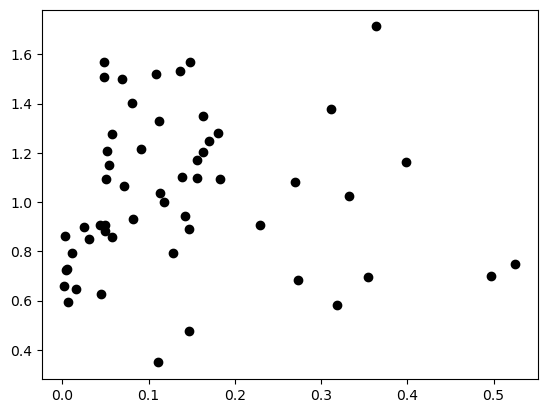

In [15]:
plt.scatter(flow['asian_ratio'],flow['average_percentage_change'],color='black')

In [19]:
flow[flow['asian_ratio']>0.35]

,2020_05,2020_06,2022_05,2022_06,total,hispanic,non-hispanic white,non-hispanic black,non-hispanic asian,non-hispanic other,...,industry_10,industry_11,industry_12,industry_13,num_cars,diverse index,diffindiff,percentage_change_05,percentage_change_06,average_percentage_change
zip,,,,,,,,,,,,,,,,,,,,,
90012,43.563455,41.561983,109.965812,119.823583,37268.0,10660.0,6428.0,5271.0,13542.0,1367.0,...,0.186,0.152,0.046,0.031,35363.0,0.735048,144.663957,1.528637,1.897678,1.713158
90504,112.920940,101.824332,215.726378,240.562316,32703.0,7922.0,8464.0,1130.0,13045.0,2142.0,...,0.192,0.071,0.052,0.024,26846.0,0.709735,241.543422,0.938030,1.387545,1.162787
90745,150.346204,122.245036,218.521851,222.598477,55567.0,24364.0,4037.0,4109.0,19712.0,3345.0,...,0.251,0.099,0.036,0.038,46030.0,0.667539,168.529088,0.495700,0.895689,0.695695
91801,59.786000,53.040017,76.744954,117.464268,54161.0,17607.0,5086.0,1422.0,28448.0,1598.0,...,0.243,0.112,0.056,0.056,37811.0,0.608055,81.383205,0.283661,1.214635,0.749148
91803,224.052926,203.357514,279.225913,436.636540,30093.0,11849.0,2385.0,445.0,14946.0,468.0,...,0.245,0.129,0.054,0.069,23535.0,0.591551,288.452013,0.247179,1.156616,0.701897
